In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_parquet('output/find-consensus-profiles-map.parquet')

In [3]:
plot_pvalue_df = (
    df.query("below_corrected_p==True")
    .groupby(["scenario", "annotation", "profile"])
    .mean_average_precision.count()
    .reset_index()
    .rename(columns={"mean_average_precision": "count"})
)

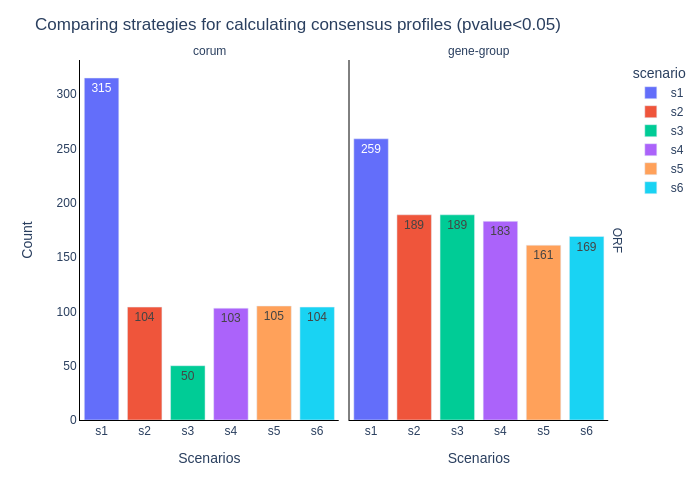

In [4]:
fig = (
    px.bar(
        plot_pvalue_df,
        x="scenario",
        y="count",
        color="scenario",
        facet_col="annotation",
        facet_row="profile",
        text="count",
    )
    .update_layout(
        title="Comparing strategies for calculating consensus profiles (pvalue<0.05)",
        xaxis1=dict(title="Scenarios", linecolor="black"),
        xaxis2=dict(title="Scenarios", linecolor="black"),
        xaxis3=dict(linecolor="black"),
        xaxis4=dict(linecolor="black"),
        yaxis1=dict(title="Count", linecolor="black"),
        yaxis2=dict(linecolor="black"),
        yaxis3=dict(title="Count", linecolor="black"),
        yaxis4=dict(linecolor="black"),
        plot_bgcolor="rgba(0,0,0,0)",
    )
    .for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
)

fig.write_image("figures/consensus-profile-comparison-pvalue.png", height=480, width=640, scale=2)
fig.write_image("figures/consensus-profile-comparison-pvalue.svg", height=480, width=640, scale=2)
fig.show("png")

In [5]:
plot_map_df = (
    df.query("mean_average_precision>0.2")
    .groupby(["scenario", "annotation", "profile"])
    .mean_average_precision.count()
    .reset_index()
    .rename(columns={"mean_average_precision": "count"})
)

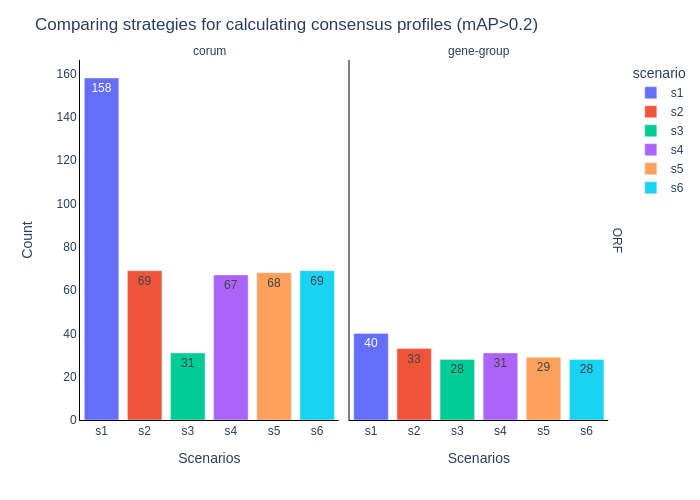

In [6]:
fig = (
    px.bar(
        plot_map_df,
        x="scenario",
        y="count",
        color="scenario",
        facet_col="annotation",
        facet_row="profile",
        text="count",
    )
    .update_layout(
        title="Comparing strategies for calculating consensus profiles (mAP>0.2)",
        xaxis1=dict(title="Scenarios", linecolor="black"),
        xaxis2=dict(title="Scenarios", linecolor="black"),
        xaxis3=dict(linecolor="black"),
        xaxis4=dict(linecolor="black"),
        yaxis1=dict(title="Count", linecolor="black"),
        yaxis2=dict(linecolor="black"),
        yaxis3=dict(title="Count", linecolor="black"),
        yaxis4=dict(linecolor="black"),
        plot_bgcolor="rgba(0,0,0,0)",
    )
    .for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
)

fig.write_image("figures/consensus-profile-comparison-map.png", height=480, width=640, scale=2)
fig.write_image("figures/consensus-profile-comparison-map.svg", height=480, width=640, scale=2)
fig.show("png")